## 0. Chapter 0
    
    0.1 Import
    0.2 Read CSVs
    0.3 Functions
        0.3.1 KMeans_silhouettes_score
        0.3.2 clustering_test
        

## 1. Choose clustering algorithm and DataFrame

    1.1 RFM
    1.2 Second DataFrame
    1.3 Silhouette score
        1.3.1 silhouette dataframe
        1.3.2 plot
    1.4 Random_state
        
    
## 2. Clustering

    2.1 Clusters labels
    2.2 Interpretation of clusters

## 0. Chapter 0

### 0.1 Import

In [1]:
import pandas as pd
import numpy as np
import math

#time
import datetime as dt
import time

#plot
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from itertools import combinations

# sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import MiniBatchKMeans

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### 0.2 Read CSV

In [2]:
separator_line = '\n\n'+'\033[1m_\033[0m'*100+'\n'+'\033[1m_\033[0m'*100+'\n\n'

# df
df = pd.read_csv('DataFrame.csv', encoding='utf-8')
print('DataFrame.csv')
display(df.head(3))
print(separator_line)

# RFM_df
RFM_df = pd.read_csv('RecencyFrequencyMonetary_DataFrame.csv').set_index('customer_unique_id')
print('RecencyFrequencyMonetary_DataFrame.csv')
display(RFM_df.head(3))
print(separator_line)

# RFM_skew_scaled_df
RFM_skew_scaled_df = pd.read_csv('RFM_skew_scaled_df.csv').set_index('customer_unique_id')
print('RFM_skew_scaled_df.csv')
display(RFM_skew_scaled_df.head(3))
print(separator_line)

# second_cluster_df
second_cluster_df = pd.read_csv('second_cluster_df.csv').set_index('customer_unique_id')
print('second_cluster_df.csv')
display(second_cluster_df.head(3))
print(separator_line)

# sec_skew_scaled_df
sec_skew_scaled_df = pd.read_csv('sec_skew_scaled_df.csv').set_index('customer_unique_id')
print('sec_skew_scaled_df.csv')
display(sec_skew_scaled_df.head(3))


DataFrame.csv


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_volume_cm^3,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,order_delivered_delay,order_delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,107136.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture,-10.558623,8.812500
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,107136.0,275.79,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture,-20.993171,18.971956
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,107136.0,275.79,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture,-20.993171,18.971956




____________________________________________________________________________________________________
____________________________________________________________________________________________________


RecencyFrequencyMonetary_DataFrame.csv


,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22




____________________________________________________________________________________________________
____________________________________________________________________________________________________


RFM_skew_scaled_df.csv


,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.732097,-0.175251,0.286880
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.706437,-0.175251,-1.953690
0000f46a3911fa3c0805444483337064,1.651975,-0.175251,-0.293599




____________________________________________________________________________________________________
____________________________________________________________________________________________________


second_cluster_df.csv


,Recency,Frequency,Items_mean,Monetary_mean,Score_mean
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,1.0,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,1.0,27.19,4.0
0000f46a3911fa3c0805444483337064,537,1,1.0,86.22,3.0




____________________________________________________________________________________________________
____________________________________________________________________________________________________


sec_skew_scaled_df.csv


,Recency,Frequency,Items_mean,Monetary_mean,Score_mean
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.732097,-0.175251,-0.335507,0.405154,0.767217
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.706437,-0.175251,-0.335507,-1.964762,-0.496209
0000f46a3911fa3c0805444483337064,1.651975,-0.175251,-0.335507,-0.225811,-1.308783


### 0.3 Functions

In [3]:
def KMeans_silhouettes_score(X, min_cl=2, max_cl=10):
    """
    Plot a Sihouette Score for KMeans Clustering
    Print the execution time
    
    Parameters:
    - X (pandas.core.frame.DataFrame) : dataframe on which we want to perform clustering
    - min_cl (int) : minimum clusters number
    - max_cl (int) : maximum clusters number
    
    Returns:
    None
    """
    
    silhouettes = []
    for num_clusters in range(min_cl,max_cl):
        tic = time.time()
        cls = KMeans(n_clusters=num_clusters)
        
        cls.fit(X)
        silh = silhouette_score(X, cls.labels_)
        silhouettes.append(silh)
        toc=time.time()
        print("Cluster # {} execution time : {} min".format(num_clusters, round((toc-tic)/60,2)))
    
    plt.plot(range(min_cl,max_cl), silhouettes, marker='o')
    plt.show()
    plt.close('all')
    return

In [4]:
def clustering_test(X, initial_str, min_cl=2, max_cl=10):
    """
    Test clustering algorithms':
        - K-Means
        - Bisecting K-Means
        - MiniBatchKMeans
        - DBSCAN
        - OPTICS
    
    Plot Elbow test for kmeans clusters
    
    Calculate and plot silhouette_score
    
    
    Parameters:
    - X (pd.DataFrame): Data on which fit clustering algorithm's
    
    Returns:
    - silhouette_dict (dict): dict with silhouette score results
    
    """
    silhouette_dict = {}

    # K-Means
    
    # Distortion Score Elbow
    k_means = KMeans()
    elbow = KElbowVisualizer(k_means, k=(min_cl, max_cl), metric= 'distortion')
    elbow.fit(X)
    elbow.show()
    
    # Silhouette score
    silhouettes =  []
    for num_clusters in range(2,10):
        tic = time.time()
        cls = KMeans(n_clusters=num_clusters)
        cls.fit(X)
        silh = silhouette_score(X, cls.labels_)
        toc=time.time()
        silhouettes.append(silh)
        silhouette_dict[initial_str+'K-Means_'+str(num_clusters)+'clusters'] = [silh, toc-tic]
        print("K-Means Cluster # {} \texecution time : {} min \tsilhouette score : {}".format(num_clusters, round((toc-tic)/60,2), silh))
        
    
    plt.title("K-Means Silhouette_Score")
    plt.plot(range(min_cl, max_cl), silhouettes, marker='o')
    plt.ylabel('Silhouette score')
    plt.xlabel("K-Mean #")
    plt.show()
    plt.close('all')
    
    #####################
    print(separator_line)
    #####################
    
    # Bisecting K-Means
    
    # Distortion Score Elbow
    bi_k_means = BisectingKMeans()
    elbow = KElbowVisualizer(bi_k_means, k=(min_cl, max_cl), metric= 'distortion')
    elbow.fit(X)
    elbow.show()
    
    # Silhouette score
    silhouettes = []
    for num_clusters in range(2,10):
        tic = time.time()
        cls = BisectingKMeans(n_clusters=num_clusters)
        cls.fit(X)
        silh = silhouette_score(X, cls.labels_)
        toc=time.time()
        silhouettes.append(silh)
        silhouette_dict[initial_str+'Bisecting_K-Means_'+str(num_clusters)+'clusters'] = [silh, toc-tic]
        print("Bisecting K-Means Cluster # {} \texecution time : {} min \tsilhouette score : {}".format(num_clusters, round((toc-tic)/60,2), silh))
    
    plt.title("Bisecting K-Means Silhouette_Score")
    plt.plot(range(min_cl, max_cl), silhouettes, marker='o')
    plt.ylabel('Silhouette score')
    plt.xlabel("K-Mean #")
    plt.show()
    plt.close('all')
    
    #####################
    print(separator_line)
    #####################
    
    # MiniBatchKMeans
    
    # Distortion Score Elbow
    mini_k_means = MiniBatchKMeans()
    elbow = KElbowVisualizer(mini_k_means, k=(min_cl, max_cl), metric= 'distortion')
    elbow.fit(X)
    elbow.show()
    
    # Silhouette score
    silhouettes = []
    for num_clusters in range(min_cl, max_cl):
        tic = time.time()
        cls = MiniBatchKMeans(n_clusters=num_clusters)
        cls.fit(X)
        silh = silhouette_score(X, cls.labels_)
        toc=time.time()
        silhouettes.append(silh)
        silhouette_dict[initial_str+'MiniBatch_K-Means_'+str(num_clusters)+'clusters'] = [silh, toc-tic]
        print("MiniBatch K-Means Cluster # {} \texecution time : {} min \tsilhouette score : {}".format(num_clusters, round((toc-tic)/60,2), silh))
    
    plt.title("MiniBatch K-Means Silhouette_Score")
    plt.plot(range(min_cl, max_cl), silhouettes, marker='o')
    plt.ylabel('Silhouette score')
    plt.xlabel("K-Mean #")
    plt.show()
    plt.close('all')
    
    #####################
    print(separator_line)
    #####################
    
    # DBSCAN
    
    tic = time.time()
    dbs_cls = DBSCAN().fit(X)
    silh = silhouette_score(X, dbs_cls.labels_)
    toc = time.time()
    silhouette_dict[initial_str+'DBSCAN'] = [silh, toc-tic]

    print("DBSCAN : \n\tsilhouette score : {} ; \n\texecution time : {} min".format(silh, round((toc-tic)/60,2)))
    unique, counts = np.unique(dbs_cls.labels_, return_counts=True)
    for key, value in dict(zip(unique, counts)).items():
        print("\tfor label {} : \t{} values".format(key,value))

    
    return silhouette_dict

## 1. Choose clustering algorithm and DataFrame

### 1.1 RFM

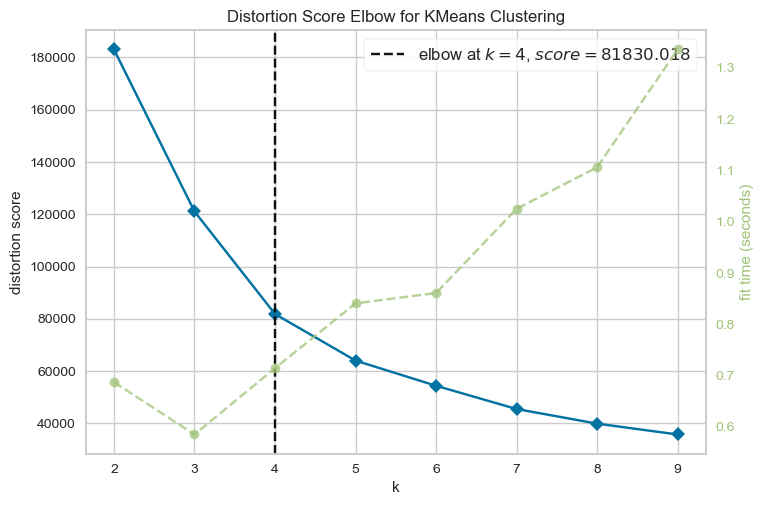

K-Means Cluster # 2 	execution time : 1.53 min 	silhouette score : 0.30230423027845915
K-Means Cluster # 3 	execution time : 1.52 min 	silhouette score : 0.3422433664857849
K-Means Cluster # 4 	execution time : 1.47 min 	silhouette score : 0.35730470388396834
K-Means Cluster # 5 	execution time : 1.48 min 	silhouette score : 0.3370619486630615
K-Means Cluster # 6 	execution time : 1.46 min 	silhouette score : 0.3339387053286376
K-Means Cluster # 7 	execution time : 1.47 min 	silhouette score : 0.34777586069839755
K-Means Cluster # 8 	execution time : 1.49 min 	silhouette score : 0.34294604990812444
K-Means Cluster # 9 	execution time : 1.5 min 	silhouette score : 0.3445488170760121


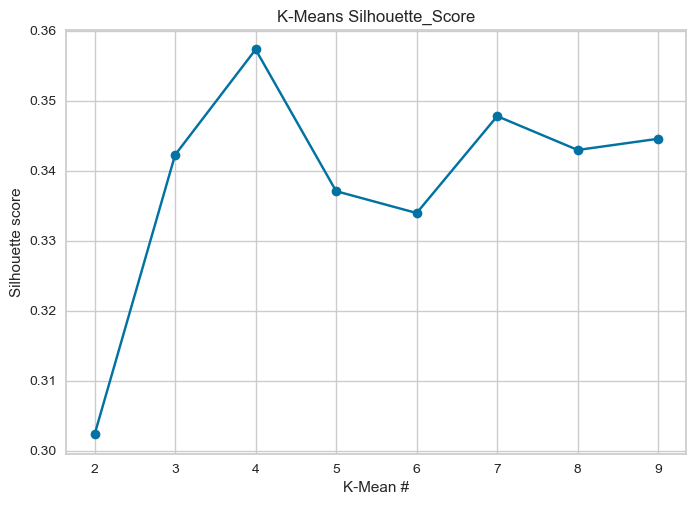



____________________________________________________________________________________________________
____________________________________________________________________________________________________




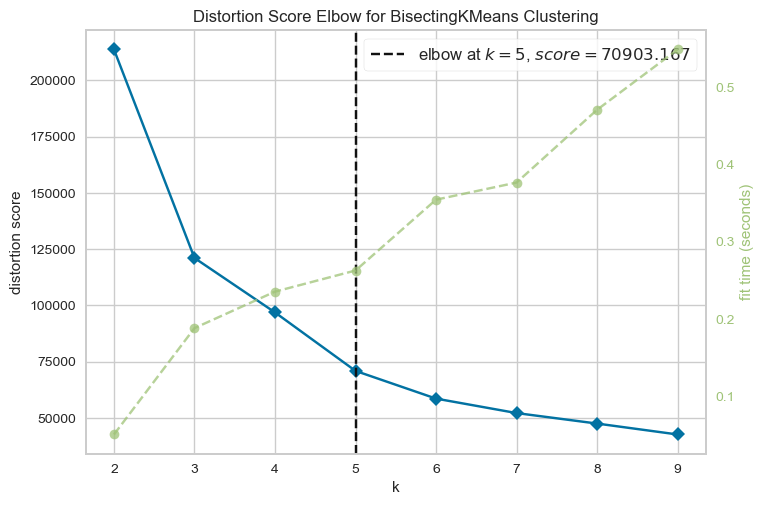

Bisecting K-Means Cluster # 2 	execution time : 1.57 min 	silhouette score : 0.3023084838896562
Bisecting K-Means Cluster # 3 	execution time : 1.6 min 	silhouette score : 0.32032819570044935
Bisecting K-Means Cluster # 4 	execution time : 1.36 min 	silhouette score : 0.31875086291817645
Bisecting K-Means Cluster # 5 	execution time : 1.33 min 	silhouette score : 0.3303201251615802
Bisecting K-Means Cluster # 6 	execution time : 1.32 min 	silhouette score : 0.28859375226090805
Bisecting K-Means Cluster # 7 	execution time : 1.34 min 	silhouette score : 0.28867719347540083
Bisecting K-Means Cluster # 8 	execution time : 1.33 min 	silhouette score : 0.2716505499369012
Bisecting K-Means Cluster # 9 	execution time : 1.31 min 	silhouette score : 0.2682527034499854


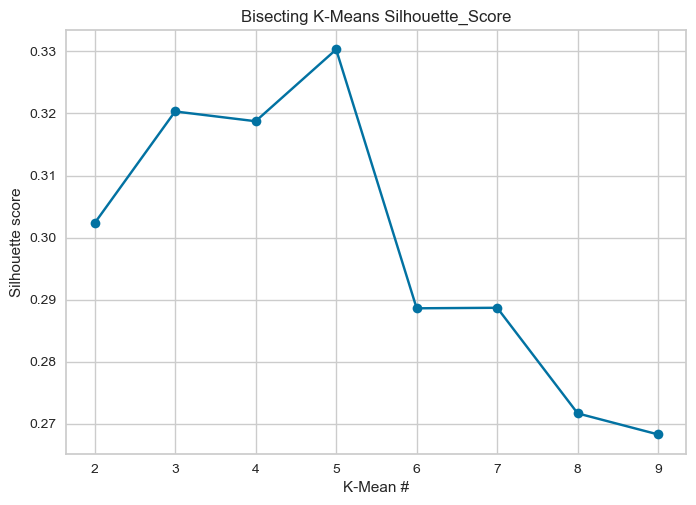



____________________________________________________________________________________________________
____________________________________________________________________________________________________




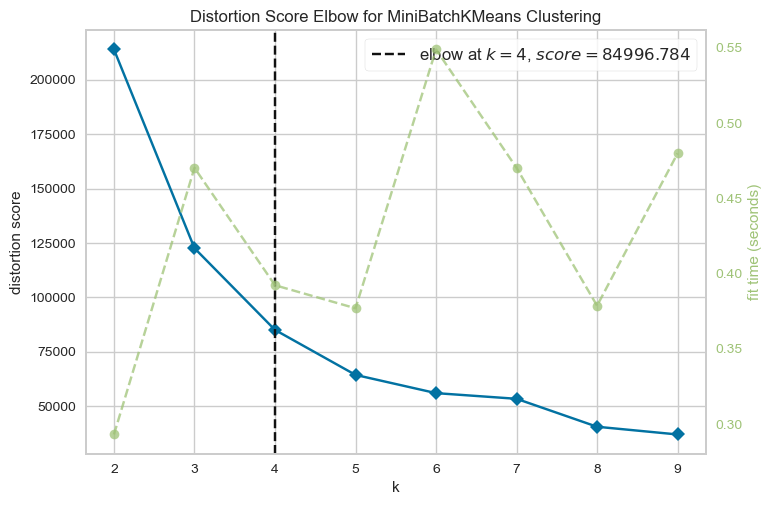

MiniBatch K-Means Cluster # 2 	execution time : 1.38 min 	silhouette score : 0.28903007875516634
MiniBatch K-Means Cluster # 3 	execution time : 1.39 min 	silhouette score : 0.31491782981080774
MiniBatch K-Means Cluster # 4 	execution time : 1.35 min 	silhouette score : 0.3440809204381477
MiniBatch K-Means Cluster # 5 	execution time : 1.32 min 	silhouette score : 0.33375202789971653
MiniBatch K-Means Cluster # 6 	execution time : 1.32 min 	silhouette score : 0.32299047511719997
MiniBatch K-Means Cluster # 7 	execution time : 1.32 min 	silhouette score : 0.3421689635492808
MiniBatch K-Means Cluster # 8 	execution time : 1.33 min 	silhouette score : 0.32776501799330143
MiniBatch K-Means Cluster # 9 	execution time : 1.31 min 	silhouette score : 0.3356583568368715


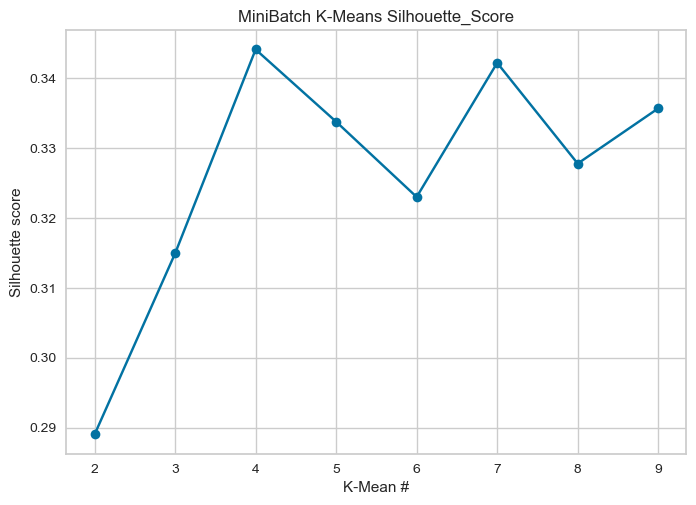



____________________________________________________________________________________________________
____________________________________________________________________________________________________


DBSCAN : 
	silhouette score : 0.7078714780224609 ; 
	execution time : 2.39 min
	for label -1 : 	3 values
	for label 0 : 	89994 values
	for label 1 : 	2762 values


In [5]:
RFM_silhouette_dict = clustering_test(RFM_skew_scaled_df, initial_str='RFM - ')

### 1.2 Second DataFrame

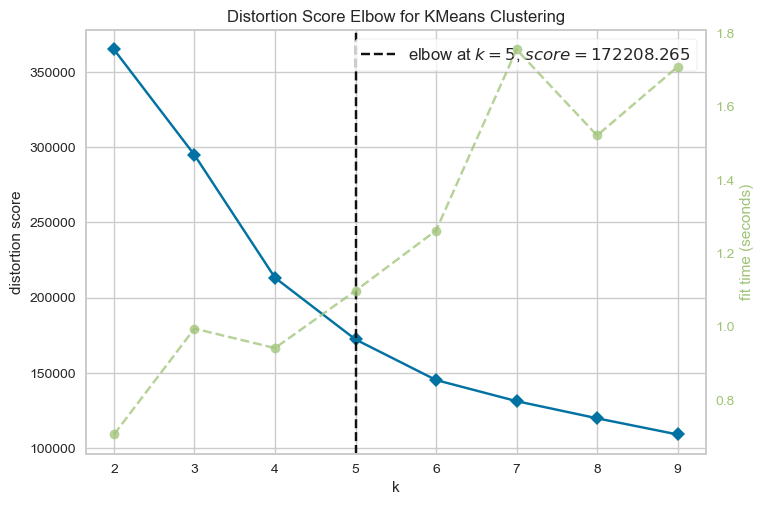

K-Means Cluster # 2 	execution time : 1.54 min 	silhouette score : 0.44877756082008335
K-Means Cluster # 3 	execution time : 1.53 min 	silhouette score : 0.46517469157965524
K-Means Cluster # 4 	execution time : 1.43 min 	silhouette score : 0.31559815049869344
K-Means Cluster # 5 	execution time : 1.39 min 	silhouette score : 0.30586480721808007
K-Means Cluster # 6 	execution time : 1.39 min 	silhouette score : 0.3025645325011491
K-Means Cluster # 7 	execution time : 1.38 min 	silhouette score : 0.30030925664520697
K-Means Cluster # 8 	execution time : 1.37 min 	silhouette score : 0.2878505506732275
K-Means Cluster # 9 	execution time : 1.37 min 	silhouette score : 0.29323144479454244


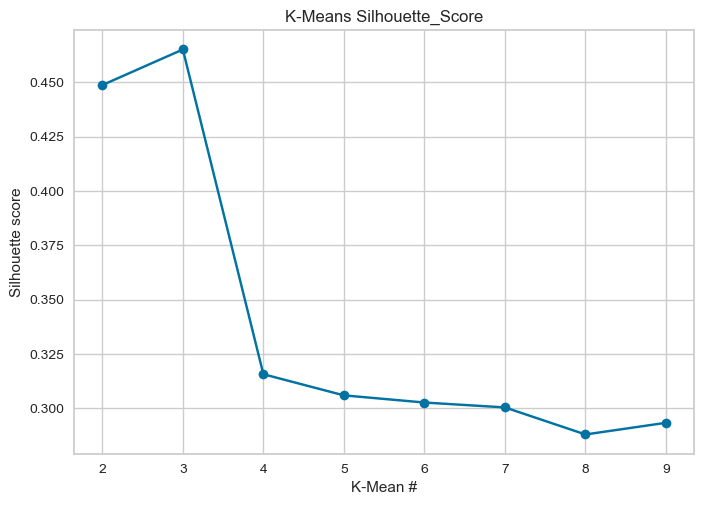



____________________________________________________________________________________________________
____________________________________________________________________________________________________




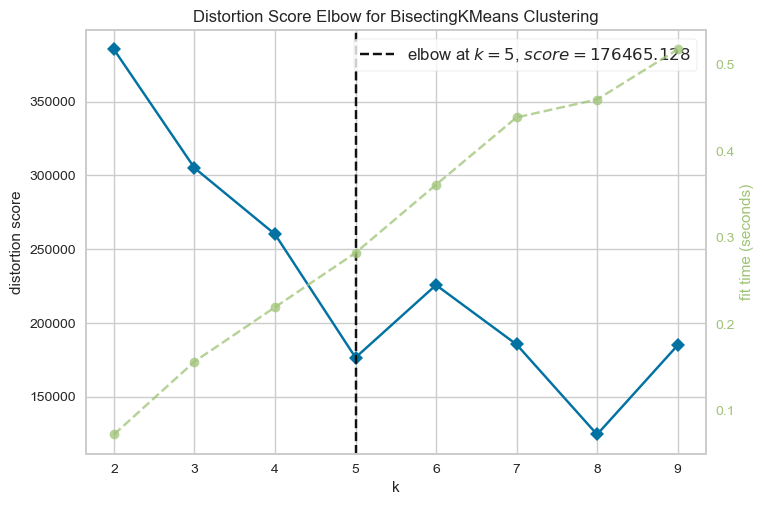

Bisecting K-Means Cluster # 2 	execution time : 1.54 min 	silhouette score : 0.6086375467698831
Bisecting K-Means Cluster # 3 	execution time : 1.39 min 	silhouette score : 0.19836816417481737
Bisecting K-Means Cluster # 4 	execution time : 1.38 min 	silhouette score : 0.25323297184046223
Bisecting K-Means Cluster # 5 	execution time : 1.36 min 	silhouette score : 0.2607026751914974
Bisecting K-Means Cluster # 6 	execution time : 1.36 min 	silhouette score : 0.23778204683419307
Bisecting K-Means Cluster # 7 	execution time : 1.36 min 	silhouette score : 0.269827030234777
Bisecting K-Means Cluster # 8 	execution time : 1.35 min 	silhouette score : 0.23171607973826724
Bisecting K-Means Cluster # 9 	execution time : 1.35 min 	silhouette score : 0.23702114195505575


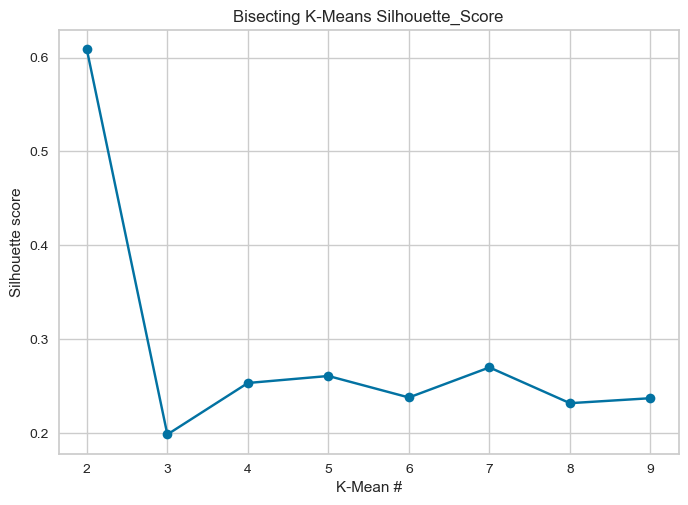



____________________________________________________________________________________________________
____________________________________________________________________________________________________




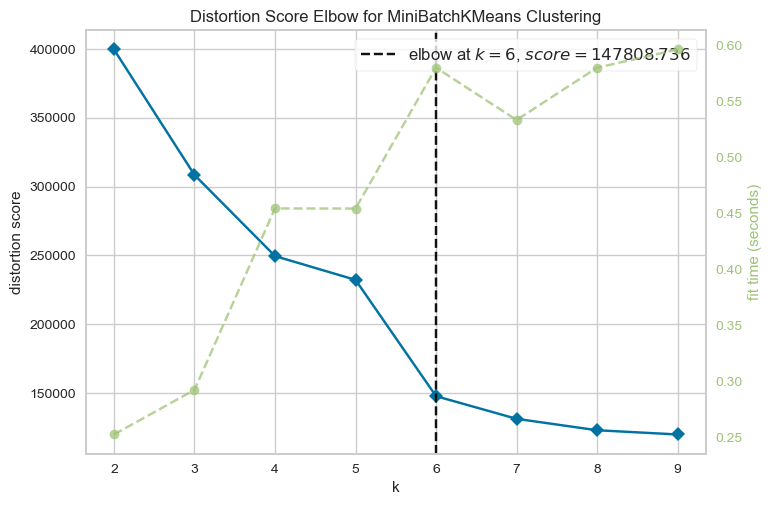

MiniBatch K-Means Cluster # 2 	execution time : 1.45 min 	silhouette score : 0.25195873508660027
MiniBatch K-Means Cluster # 3 	execution time : 1.44 min 	silhouette score : 0.26616172191601517
MiniBatch K-Means Cluster # 4 	execution time : 1.43 min 	silhouette score : 0.310955443634816
MiniBatch K-Means Cluster # 5 	execution time : 1.38 min 	silhouette score : 0.3056280523256455
MiniBatch K-Means Cluster # 6 	execution time : 1.38 min 	silhouette score : 0.2994885337607929
MiniBatch K-Means Cluster # 7 	execution time : 1.36 min 	silhouette score : 0.2855612079727581
MiniBatch K-Means Cluster # 8 	execution time : 1.35 min 	silhouette score : 0.298281496399164
MiniBatch K-Means Cluster # 9 	execution time : 1.35 min 	silhouette score : 0.284560021071209


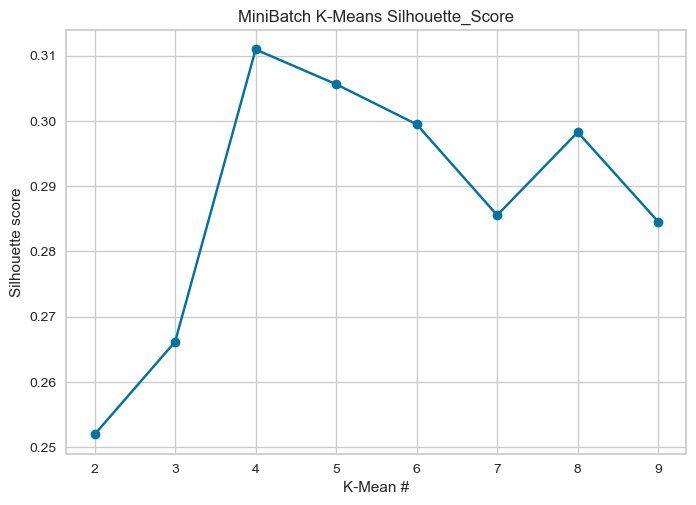



____________________________________________________________________________________________________
____________________________________________________________________________________________________


DBSCAN : 
	silhouette score : 0.29290423680684513 ; 
	execution time : 1.82 min
	for label -1 : 	103 values
	for label 0 : 	48997 values
	for label 1 : 	32271 values
	for label 2 : 	3196 values
	for label 3 : 	4100 values
	for label 4 : 	1414 values
	for label 5 : 	2062 values
	for label 6 : 	609 values
	for label 7 : 	7 values


In [6]:
second_silhouette_dict = clustering_test(sec_skew_scaled_df, initial_str='second - ')

### 1.3 Silhouette scores

##### silhouette dataframe

In [7]:
# save silhouette score in a unique dataframe
silhouette_dict= RFM_silhouette_dict.copy()
silhouette_dict.update(second_silhouette_dict)
silhouette_df = pd.DataFrame.from_dict(silhouette_dict, orient='index',columns =['score','time'])
silhouette_df.reset_index(inplace=True)
silhouette_df.rename(columns={'index':'method'}, inplace=True)
silhouette_df


##### plot

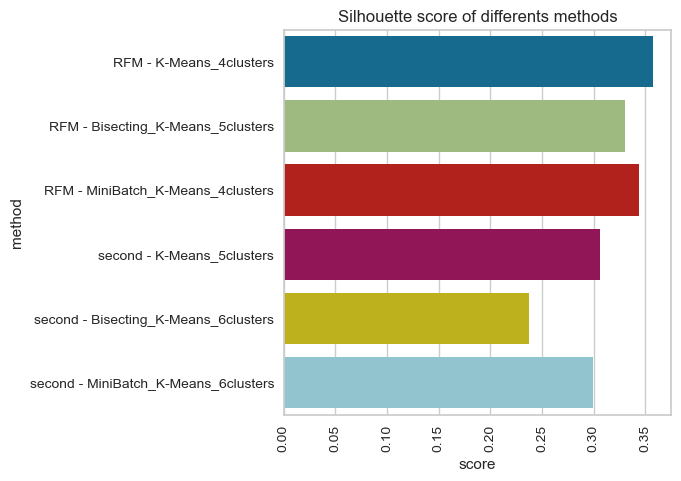

,method,score,time
0,RFM - K-Means_4clusters,0.357305,88.240961
1,RFM - Bisecting_K-Means_5clusters,0.330320,79.567456
2,RFM - MiniBatch_K-Means_4clusters,0.344081,80.845966
3,second - K-Means_5clusters,0.305865,83.214927
4,second - Bisecting_K-Means_6clusters,0.237782,81.789471
5,second - MiniBatch_K-Means_6clusters,0.299489,82.854743


In [47]:
# keep just the rilevant silhouette score
silhouette = silhouette_df.iloc[[2,11,18,28,37,45]].reset_index(drop=True)

plt.figure(figsize=(5,5))
plt.title('Silhouette score of differents methods')
sns.barplot(data=silhouette, y='method',x='score')
plt.xticks(rotation=90)
plt.show()
plt.close('all')
silhouette

### 1.4 Random_state

In [59]:
# find the best random_state
silhouette_rand_state = {}
for k in [25, 50, 75, 100, 150, 200, 300, 400, 500, 1000]:
    tic = time.time()
    cls = KMeans(n_clusters=4, random_state = k)
    cls.fit(RFM_skew_scaled_df)
    silh = silhouette_score(RFM_skew_scaled_df, cls.labels_)
    toc = time.time()
    silhouette_rand_state[k] = [silh, toc-tic]

silhouette_rand_state_df = pd.DataFrame.from_dict(silhouette_rand_state, orient='index',columns =['score','time'])
silhouette_rand_state_df.reset_index(inplace=True)
silhouette_rand_state_df.rename(columns={'index':'random_state'}, inplace=True)
display(silhouette_rand_state_df)

# plot
plt.figure(figsize=(5,5))
sns.lineplot(data=silhouette_rand_state_df, x='random_state',y='score', markers=True, dashes=False)
# plt.xticks([25, 50, 75, 100, 150, 200, 300, 400, 500, 1000])
plt.xscale('log')
plt.show()
plt.close('all')


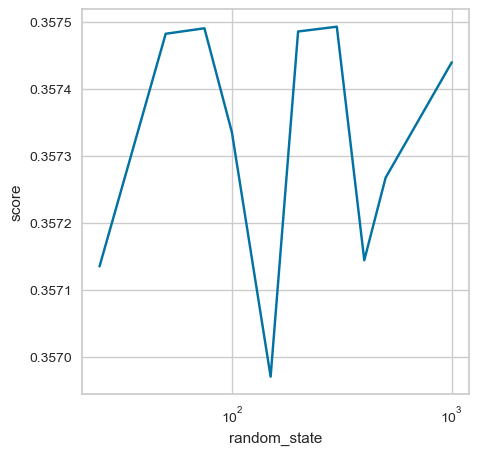

In [58]:
# plot
plt.figure(figsize=(5,5))
sns.lineplot(data=silhouette_rand_state_df, x='random_state',y='score', markers=True, dashes=False)
# plt.xticks([25, 50, 75, 100, 150, 200, 300, 400, 500, 1000])
plt.xscale('log')
plt.show()
plt.close('all')


## 2. Clustering

### 2.1 clusters labels

In [5]:
cls = KMeans(n_clusters=4, random_state=300)
cls.fit(RFM_skew_scaled_df)
RFM_df['clusters'] = cls.labels_
RFM_df

,Recency,Frequency,Monetary,clusters
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,2
0000f46a3911fa3c0805444483337064,537,1,86.22,2
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,1
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84,1
fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,2
ffff371b4d645b6ecea244b27531430a,568,1,112.46,1


### 2.2 Interpretation of clusters

In [12]:
RFM_df['clusters_name']= np.nan
RFM_df.loc[RFM_df['clusters']==0,'clusters_name']= 'recents_ones'
RFM_df.loc[RFM_df['clusters']==1,'clusters_name']= 'spending_ones'
RFM_df.loc[RFM_df['clusters']==2,'clusters_name']= 'thrifty_ones'
RFM_df.loc[RFM_df['clusters']==3,'clusters_name']= 'frequents_spending_ones'
RFM_df

,Recency,Frequency,Monetary,clusters,clusters_name
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0,recents_ones
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,2,thrifty_ones
0000f46a3911fa3c0805444483337064,537,1,86.22,2,thrifty_ones
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,thrifty_ones
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,1,spending_ones
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84,1,spending_ones
fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,2,thrifty_ones
ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,spending_ones


##### boxplot

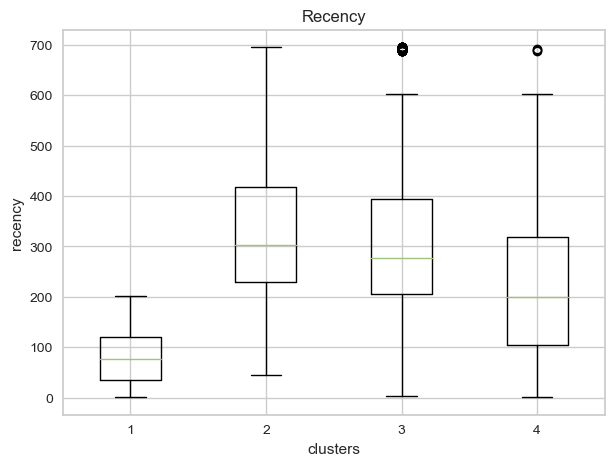

In [13]:
plt.figure(figsize=(7,5))
plt.title('Recency')
plt.boxplot([RFM_df.loc[RFM_df['clusters']==0,'Recency'],
             RFM_df.loc[RFM_df['clusters']==1,'Recency'],
             RFM_df.loc[RFM_df['clusters']==2,'Recency'],
             RFM_df.loc[RFM_df['clusters']==3,'Recency']])
plt.xlabel('clusters')
plt.ylabel('recency')
plt.show()
plt.close('all')

##### displot

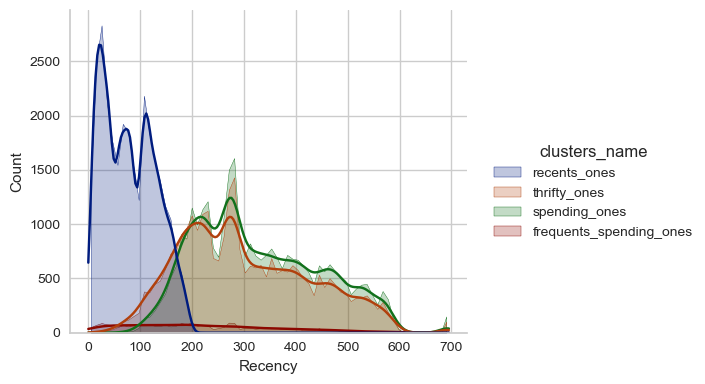

In [14]:
sns.displot(data=RFM_df, x='Recency', hue= 'clusters_name', kde=True, element="poly", palette="dark", height=4, aspect=5/4)

plt.show()
plt.close('all')

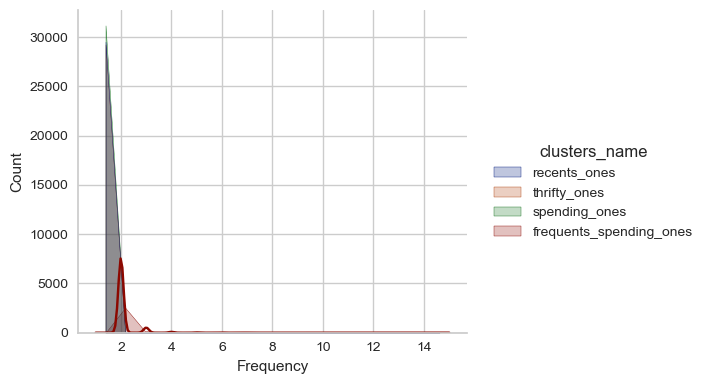

In [15]:
sns.displot(data=RFM_df, x='Frequency', hue= 'clusters_name', kde=True, element="poly", palette='dark', height=4, aspect=5/4)

plt.show()
plt.close('all')

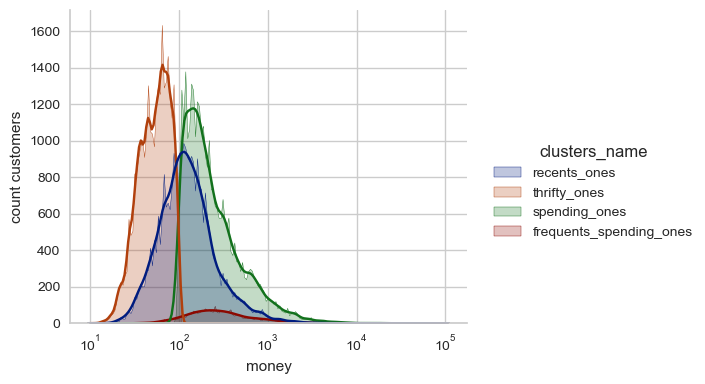

In [16]:
sns.displot(data=RFM_df, x='Monetary', hue= 'clusters_name', kde=True, element="poly", palette='dark', height=4, aspect=5/4, log_scale=True)

plt.xlabel('money')
plt.ylabel('count customers')
plt.show()
plt.close('all')

##### describe

In [48]:
print(separator_line)
print('cluster 1 : recents_ones')
display(RFM_df.loc[RFM_df['clusters']==0].describe())

print(separator_line)
print('cluster 2 : thrifty_ones')
display(RFM_df.loc[RFM_df['clusters']==1].describe())

print(separator_line)
print('cluster 3 : spending_ones')
display(RFM_df.loc[RFM_df['clusters']==2].describe())

print(separator_line)
print('cluster 4 : frequent_spending_ones')
display(RFM_df.loc[RFM_df['clusters']==3].describe())



____________________________________________________________________________________________________
____________________________________________________________________________________________________


cluster 1 : recents_ones


,Recency,Frequency,Monetary,clusters
count,29538.000000,29538.0,29538.000000,29538.0
mean,80.526136,1.0,177.177269,0.0
std,50.043168,0.0,263.285837,0.0
min,1.000000,1.0,14.290000,0.0
25%,35.000000,1.0,76.875000,0.0
50%,77.000000,1.0,118.350000,0.0
75%,120.000000,1.0,185.975000,0.0
max,201.000000,1.0,11572.800000,0.0




____________________________________________________________________________________________________
____________________________________________________________________________________________________


cluster 2 : thrifty_ones


,Recency,Frequency,Monetary,clusters
count,31198.000000,31198.0,31198.000000,31198.0
mean,327.186743,1.0,366.723178,1.0
std,121.037599,0.0,974.164760,0.0
min,46.000000,1.0,89.080000,1.0
25%,229.000000,1.0,138.260000,1.0
50%,303.000000,1.0,196.010000,1.0
75%,417.000000,1.0,346.940000,1.0
max,695.000000,1.0,109312.640000,1.0




____________________________________________________________________________________________________
____________________________________________________________________________________________________


cluster 3 : spending_ones


,Recency,Frequency,Monetary,clusters
count,29259.000000,29259.0,29259.000000,29259.0
mean,302.939164,1.0,56.516642,2.0
std,126.392002,0.0,20.909957,0.0
min,4.000000,1.0,9.590000,2.0
25%,205.000000,1.0,38.860000,2.0
50%,278.000000,1.0,55.090000,2.0
75%,394.000000,1.0,72.830000,2.0
max,695.000000,1.0,104.680000,2.0




____________________________________________________________________________________________________
____________________________________________________________________________________________________


cluster 4 : frequent_spending_ones


,Recency,Frequency,Monetary,clusters
count,2764.000000,2764.000000,2764.000000,2764.0
mean,220.441751,2.113242,485.838969,3.0
std,144.156498,0.505330,1116.888969,0.0
min,1.000000,2.000000,37.340000,3.0
25%,104.000000,2.000000,160.210000,3.0
50%,199.000000,2.000000,261.145000,3.0
75%,318.000000,2.000000,468.557500,3.0
max,692.000000,15.000000,27935.460000,3.0
